In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


Using TensorFlow backend.


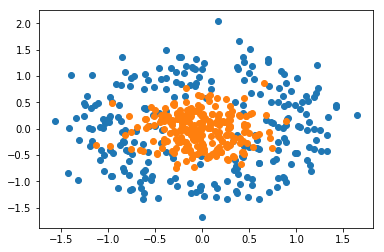

In [2]:
np.random.seed(0)

n_pts = 500
# * High noise = Really convoluted data, difficult to dsitinguish
# * factor = 0.2: Diameter is 20% large of the outer circle
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise=0.3, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
500/500 [==============================] - 0s 732us/step - loss: 0.6956 - acc: 0.4980
Epoch 2/100
500/500 [==============================] - 0s 108us/step - loss: 0.6928 - acc: 0.5860
Epoch 3/100
500/500 [==============================] - 0s 106us/step - loss: 0.6918 - acc: 0.5160
Epoch 4/100
500/500 [==============================] - 0s 91us/step - loss: 0.6909 - acc: 0.6300
Epoch 5/100
500/500 [==============================] - 0s 75us/step - loss: 0.6900 - acc: 0.6140
Epoch 6/100
500/500 [==============================] - 0s 87us/step - loss: 0.6888 - acc: 0.4360
Epoch 7/100
500/500 [==============================] - 0s 89us/step - loss: 0.6869 - acc: 0.5720
Epoch 8/100
500/500 [==============================] - 0s 116us/step - loss: 0.6852 - acc: 0.5840
Epoch 9/100
500/500 [==============================] - 0s 120us/step - loss: 0.6826 - acc: 0.6500
Ep

500/500 [==============================] - 0s 99us/step - loss: 0.2762 - acc: 0.8860
Epoch 79/100
500/500 [==============================] - 0s 102us/step - loss: 0.2756 - acc: 0.8860
Epoch 80/100
500/500 [==============================] - 0s 132us/step - loss: 0.2752 - acc: 0.8900
Epoch 81/100
500/500 [==============================] - 0s 93us/step - loss: 0.2751 - acc: 0.8860
Epoch 82/100
500/500 [==============================] - 0s 91us/step - loss: 0.2746 - acc: 0.8840
Epoch 83/100
500/500 [==============================] - 0s 77us/step - loss: 0.2745 - acc: 0.8820
Epoch 84/100
500/500 [==============================] - 0s 75us/step - loss: 0.2728 - acc: 0.8860
Epoch 85/100
500/500 [==============================] - 0s 67us/step - loss: 0.2734 - acc: 0.8820
Epoch 86/100
500/500 [==============================] - 0s 85us/step - loss: 0.2723 - acc: 0.8900
Epoch 87/100
500/500 [==============================] - 0s 74us/step - loss: 0.2721 - acc: 0.8840
Epoch 88/100
500/500 [=========

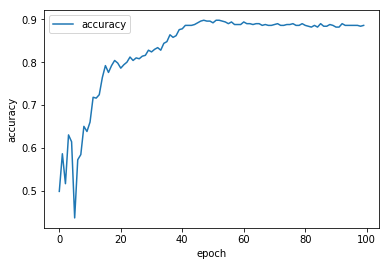

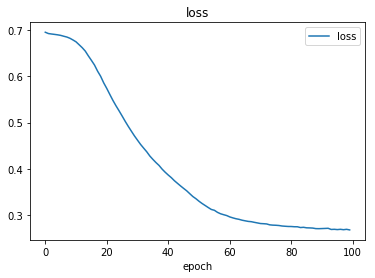

In [3]:

model = Sequential()
model.add(Dense(4 , input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(x = X, y = y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')

plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()


Prediction is:  [[0.7835932]]


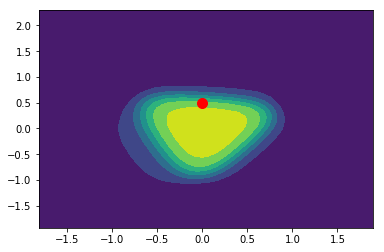

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plot_decision_boundary(X, y, model)
 
x = 0
y = 0.5
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)